In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../src/')
import mnist
from binary_rbm_numpy import *

First load the data and make it binary

In [2]:
X_train, n_row, n_col = mnist.load_images('../data/train-images.idx3-ubyte')
y_train = mnist.load_labels('../data/train-labels.idx1-ubyte')
X_test, _, _ = mnist.load_images('../data/t10k-images.idx3-ubyte')
y_test = mnist.load_labels('../data/t10k-labels.idx1-ubyte')

X_train = np.around(X_train/np.amax(X_train))
X_test = np.around(X_test/np.amax(X_test))

Train an RBM with PCD (Use batch size which is larger than the number of classes)

In [3]:
rbm_pcd = RestrictedBoltzmannMachine(n_row*n_col,100)
rbm_pcd.fit(X_train,0.01,k=5,n_iter=20,batch_size=100,persistent=True)

iteration	0	squared_reconstruction_error	0.164883	
iteration	1	squared_reconstruction_error	0.136138	
iteration	2	squared_reconstruction_error	0.124833	
iteration	3	squared_reconstruction_error	0.118263	
iteration	4	squared_reconstruction_error	0.112666	
iteration	5	squared_reconstruction_error	0.107575	
iteration	6	squared_reconstruction_error	0.103836	
iteration	7	squared_reconstruction_error	0.100556	
iteration	8	squared_reconstruction_error	0.097381	
iteration	9	squared_reconstruction_error	0.094794	
iteration	10	squared_reconstruction_error	0.092998	
iteration	11	squared_reconstruction_error	0.090870	
iteration	12	squared_reconstruction_error	0.089193	
iteration	13	squared_reconstruction_error	0.087850	
iteration	14	squared_reconstruction_error	0.086466	
iteration	15	squared_reconstruction_error	0.085289	
iteration	16	squared_reconstruction_error	0.084248	
iteration	17	squared_reconstruction_error	0.083070	
iteration	18	squared_reconstruction_error	0.082145	
iteration	19	squared_r

Visualize the weights and biases

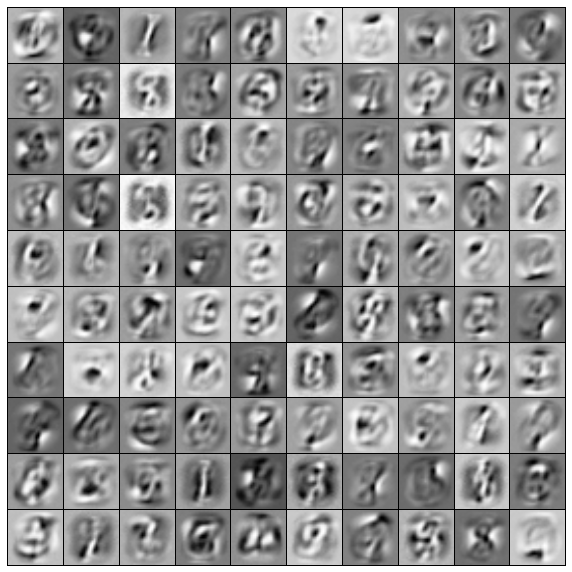

In [4]:
mnist.plot_multiple_images(rbm_pcd.weights)
plt.show()

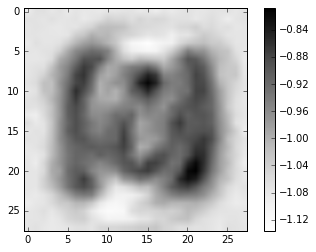

In [5]:
plt.imshow(np.reshape(rbm_pcd.bias_v,(28,28)),cmap='Greys')
plt.colorbar()

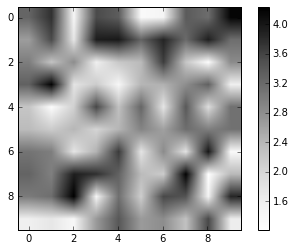

In [6]:
plt.imshow(np.reshape(rbm_pcd.bias_h,(10,10)),cmap='Greys')
plt.colorbar()

Does reconstruction of a set of test images work?

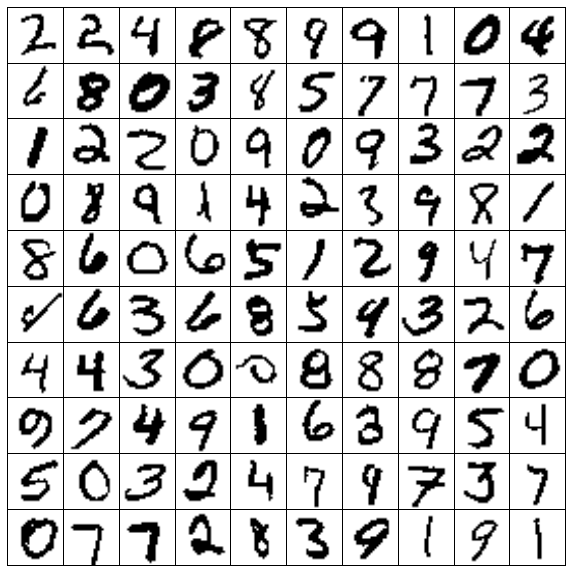

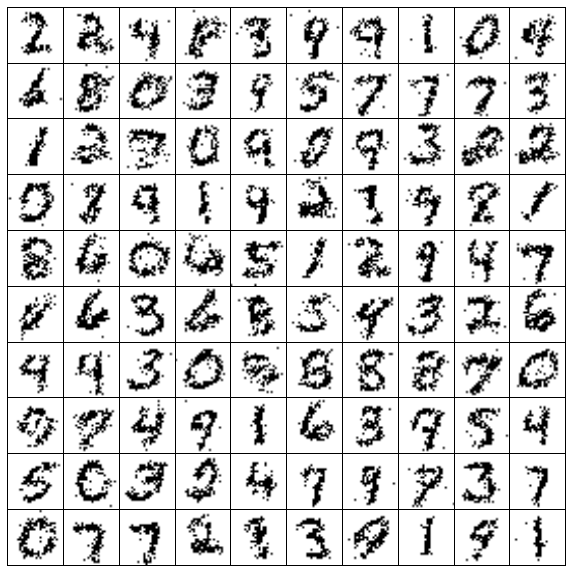

In [7]:
X_sub = X_test[np.random.randint(0,X_test.shape[0],100)]
_, _, _, X_rec = rbm_pcd.gibbs_step(X_sub)
mnist.plot_multiple_images(X_sub)
mnist.plot_multiple_images(X_rec)
plt.show()

It's not perfect, but it seems to work. We can try fitting a bit more.

In [11]:
rbm_pcd.fit(X_train,0.01,k=5,n_iter=10,batch_size=100,persistent=True)

iteration	0	squared_reconstruction_error	0.078789	
iteration	1	squared_reconstruction_error	0.078057	
iteration	2	squared_reconstruction_error	0.077354	
iteration	3	squared_reconstruction_error	0.076594	
iteration	4	squared_reconstruction_error	0.076047	
iteration	5	squared_reconstruction_error	0.075408	
iteration	6	squared_reconstruction_error	0.074939	
iteration	7	squared_reconstruction_error	0.074362	
iteration	8	squared_reconstruction_error	0.073946	
iteration	9	squared_reconstruction_error	0.073300	


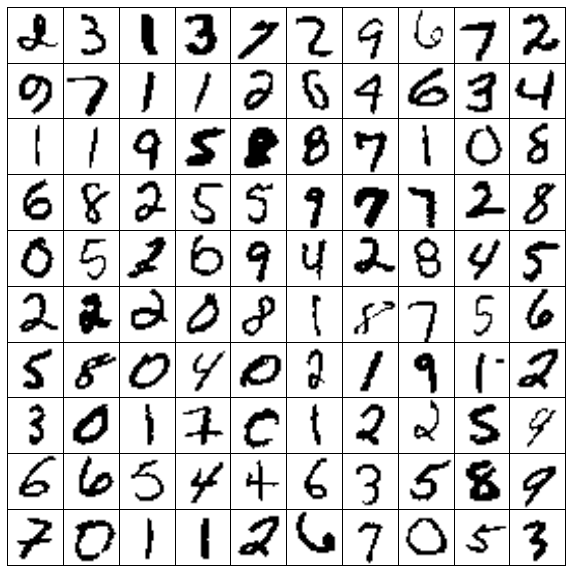

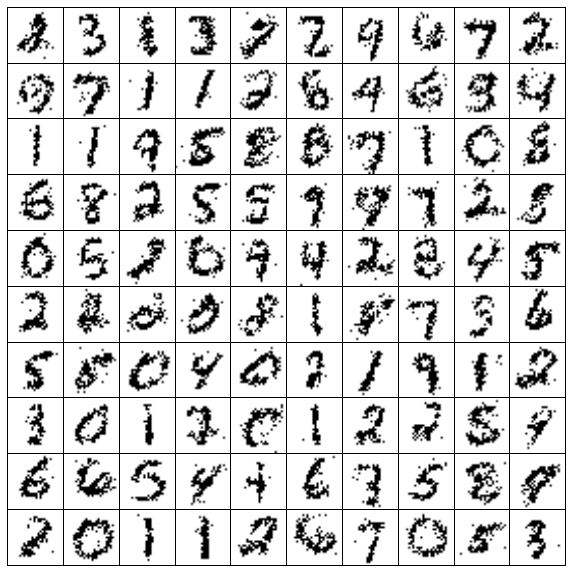

In [12]:
X_sub = X_test[np.random.randint(0,X_test.shape[0],100)]
_, _, _, X_rec = rbm_pcd.gibbs_step(X_sub)
mnist.plot_multiple_images(X_sub)
mnist.plot_multiple_images(X_rec)
plt.show()

Generate a digit from an arbitrary vector

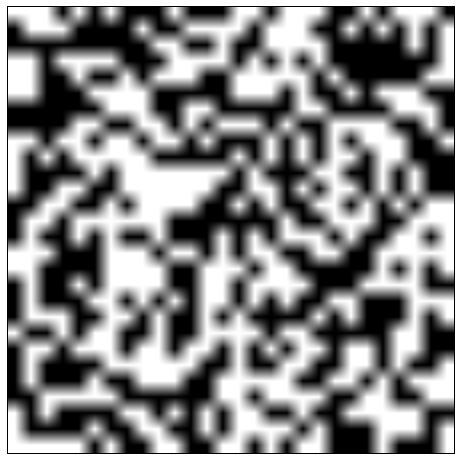

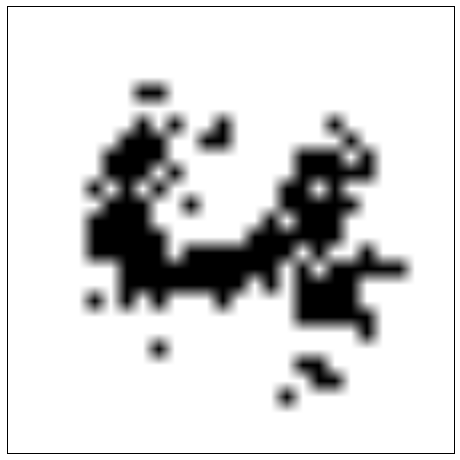

In [20]:
v_rand = np.random.randint(0,2,n_row*n_col)
v_rand = np.reshape(v_rand,(1,n_row*n_col))
plt.figure(figsize=(8,8))
plt.imshow(np.reshape(v_rand,(n_row,n_col)),cmap='Greys')
plt.xticks([])
plt.yticks([])
for i in xrange(0,100):
    _, _, _, v_rand = rbm_pcd.gibbs_step(v_rand)
mnist.plot_image(v_rand,0)
plt.show()

Try updating the cell above and see what the output looks like. It is not always a digit, but it usually resembles something a person would draw.

How does CD perform?

In [21]:
rbm_cd = RestrictedBoltzmannMachine(n_row*n_col,100)
rbm_cd.fit(X_train,0.01,k=5,n_iter=20,batch_size=100,persistent=False)

iteration	0	squared_reconstruction_error	0.146989	
iteration	1	squared_reconstruction_error	0.124912	
iteration	2	squared_reconstruction_error	0.114589	
iteration	3	squared_reconstruction_error	0.107513	
iteration	4	squared_reconstruction_error	0.102182	
iteration	5	squared_reconstruction_error	0.098135	
iteration	6	squared_reconstruction_error	0.094759	
iteration	7	squared_reconstruction_error	0.091897	
iteration	8	squared_reconstruction_error	0.089462	
iteration	9	squared_reconstruction_error	0.087369	
iteration	10	squared_reconstruction_error	0.085586	
iteration	11	squared_reconstruction_error	0.083986	
iteration	12	squared_reconstruction_error	0.082563	
iteration	13	squared_reconstruction_error	0.081319	
iteration	14	squared_reconstruction_error	0.080120	
iteration	15	squared_reconstruction_error	0.079157	
iteration	16	squared_reconstruction_error	0.078138	
iteration	17	squared_reconstruction_error	0.077282	
iteration	18	squared_reconstruction_error	0.076406	
iteration	19	squared_r

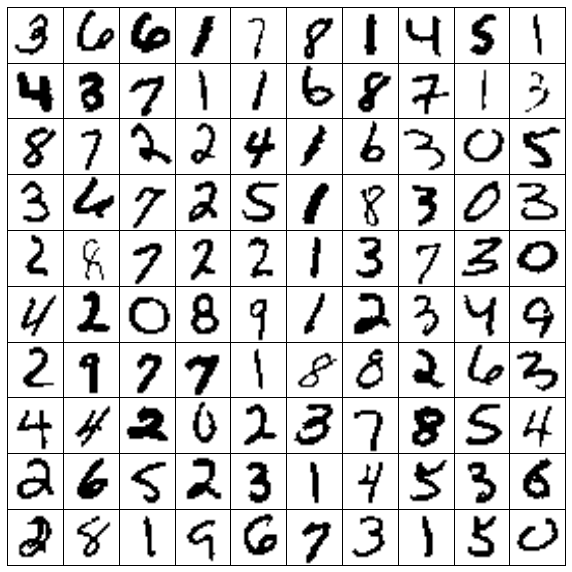

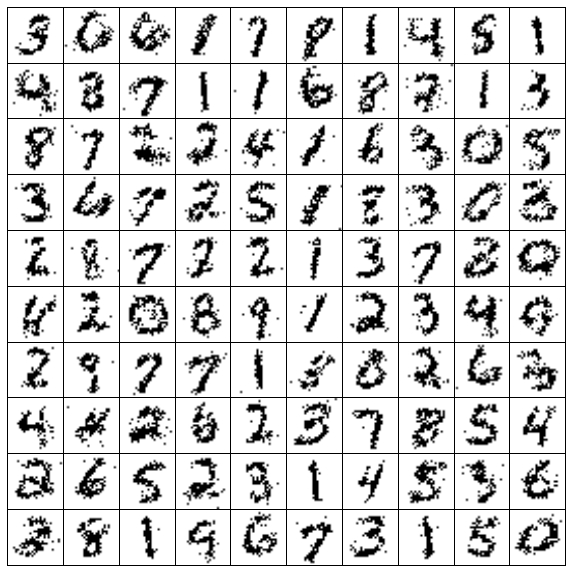

In [22]:
X_sub = X_test[np.random.randint(0,X_test.shape[0],100)]
_, _, _, X_rec = rbm_cd.gibbs_step(X_sub)
mnist.plot_multiple_images(X_sub)
mnist.plot_multiple_images(X_rec)
plt.show()

The reconstructions actually look OK. However, in only_twos.nb I show that CD does not perform as well as PCD when generating an image of a digit from a random vector.

Let's also look at the weights and biases

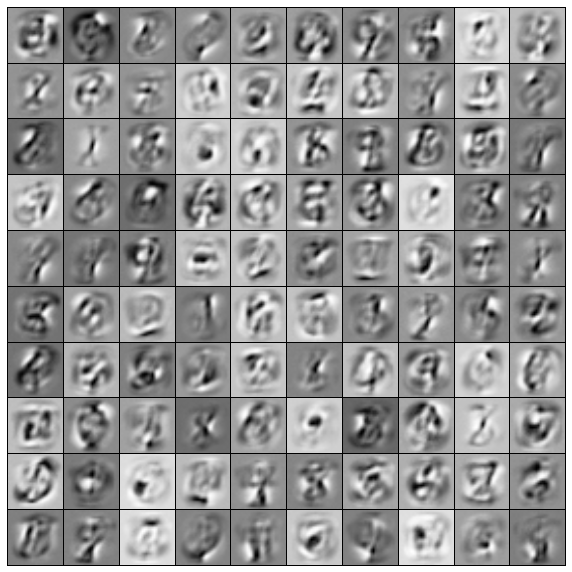

In [23]:
mnist.plot_multiple_images(rbm_cd.weights)
plt.show()

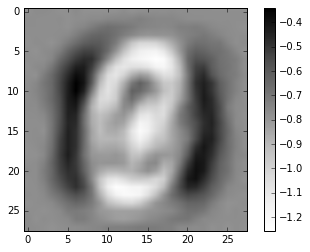

In [25]:
plt.imshow(np.reshape(rbm_cd.bias_v,(28,28)),cmap='Greys')
plt.colorbar()

Again I do not understand why the biases are negative for those visible units that one would expect to be turned on

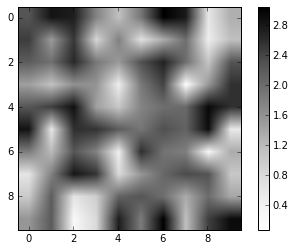

In [24]:
plt.imshow(np.reshape(rbm_cd.bias_h,(10,10)),cmap='Greys')
plt.colorbar()

Generate images from random vectors

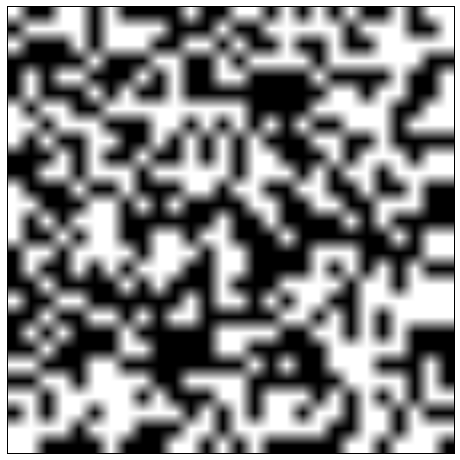

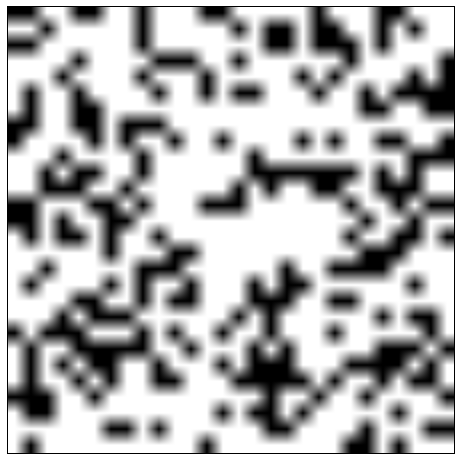

In [28]:
v_rand = np.random.randint(0,2,n_row*n_col)
v_rand = np.reshape(v_rand,(1,n_row*n_col))
plt.figure(figsize=(8,8))
plt.imshow(np.reshape(v_rand,(n_row,n_col)),cmap='Greys')
plt.xticks([])
plt.yticks([])
for i in xrange(0,100):
    _, _, _, v_rand = rbm_cd.gibbs_step(v_rand)
mnist.plot_image(v_rand,0)
plt.show()

This does not work nearly as well as for the RBM trained with PCD.

In [29]:
rbm_pcd.save_state_to_file('numpy_all_digits_pcd')

In [30]:
rbm_cd.save_state_to_file('numpy_all_digits_cd')